## Basic Time of Day Plots (without flight data)

In this notebook, we plot the number of bird strikes according to time of day. This does _not_ take the total number of flights into account. For plots of the number of bird strikes per flight each hour, see the jupyter notebook titled "Time of Day - Strikes Per Number of Flights."

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [4]:
# Load in the strike data
strikes = pd.read_csv("strikes_2000_2019.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,16,77,86,96,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Make a smaller data frame to focus on the strike time and place
strike_times = strikes[['INDX_NR','INCIDENT_DATE ','STATE',
                        'AIRPORT_ID', 'OPERATOR_ID','SPECIES_ID',
                        'DAMAGE','COST_REPAIRS',
                        'INCIDENT_MONTH','INCIDENT_YEAR',
                        'TIME_OF_DAY','TIME',
                        'FAAREGION','ENROUTE','LOCATION',
                        'HEIGHT','SPEED','DISTANCE',
                        'PHASE_OF_FLIGHT',
                        'EFFECT_NONE', 'EFFECT_ABORTED', 
                        'EFFECT_PREC_LAND', 'EFFECT_ENG_SHUT', 
                        'EFFECT_OTH', 'EFFECT_OTHER',
                        'SKY', 'PRECIP_FOG', 'PRECIP_RAIN', 
                        'PRECIP_SNOW', 'PRECIP_NONE', 
                        'BIRDS_SEEN', 'BIRDS_STRUCK', 'SIZE', 
                        'WARNED', 'REMARKS', 'AOS',
                        'OTHER_COST', 'COST_REPAIRS_INFL_ADJ', 
                        'COST_OTHER_INFL_ADJ','COMMENT',
                        'INDICATED_DAMAGE']]

In [6]:
print(strike_times['TIME_OF_DAY'].value_counts(dropna=False))

NaN      86806
Day      72944
Night    36602
Dusk      5296
Dawn      4165
Name: TIME_OF_DAY, dtype: int64


In [7]:
# In the TIME column in the original data set, 
# empty entries are denoted by the string '     '.
# Here we replace all strings of 5 spaces with NaN
# to make empty entries in the TIME column easier to identify.
strike_times = strike_times.replace('     ', np.nan)

In [8]:
# Convert the times in the 'TIME' column to datetime
# Unfortunately this assigns a date of 1900-01-01
strike_times['TIME'] = pd.to_datetime(strike_times['TIME'], 
                                      format= '%H:%M')

In [17]:
strike_times['TIME'].value_counts(dropna=False)
# sum(strike_times['TIME'].value_counts(dropna=True))

NaT                    92329
1900-01-01 10:00:00     1065
1900-01-01 09:00:00     1057
1900-01-01 08:00:00      999
1900-01-01 22:00:00      965
                       ...  
1900-01-01 01:21:00        2
1900-01-01 04:03:00        1
1900-01-01 03:23:00        1
1900-01-01 03:16:00        1
1900-01-01 02:54:00        1
Name: TIME, Length: 1441, dtype: int64

In [130]:
# print the number of strikes reported in each hour of the day
strike_times['TIME'].groupby(strike_times['TIME'].dt.hour).count()

TIME
0.0     2512
1.0     1391
2.0      939
3.0      816
4.0     1189
5.0     1705
6.0     4263
7.0     7137
8.0     7809
9.0     7837
10.0    7654
11.0    6396
12.0    5133
13.0    4436
14.0    4372
15.0    4501
16.0    4980
17.0    5601
18.0    5640
19.0    5484
20.0    5932
21.0    6433
22.0    5931
23.0    5393
Name: TIME, dtype: int64

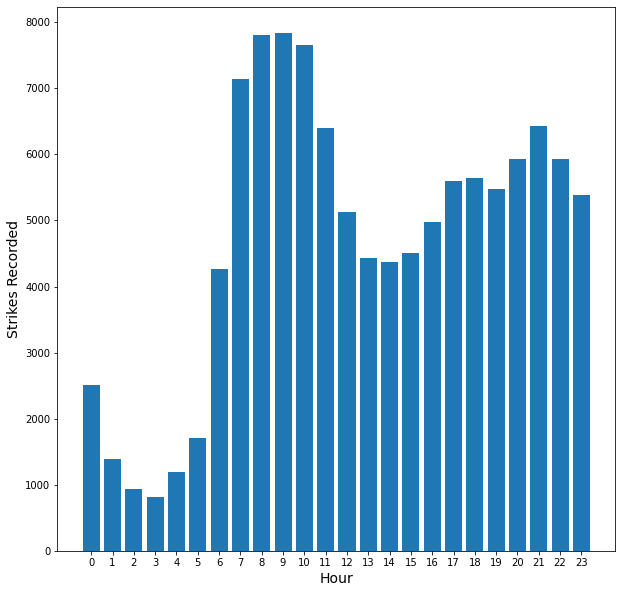

In [131]:
# Plot a histogram of times by hour
# Option 1: plot as a bar chart

plt.figure(figsize = (10,10))

plt.bar(range(0,24), strike_times['TIME'].groupby(strike_times['TIME'].dt.hour).count())
plt.xticks(range(0,24))
plt.xlabel("Hour", fontsize = 14)
plt.ylabel("Strikes Recorded", fontsize = 14)

plt.show()

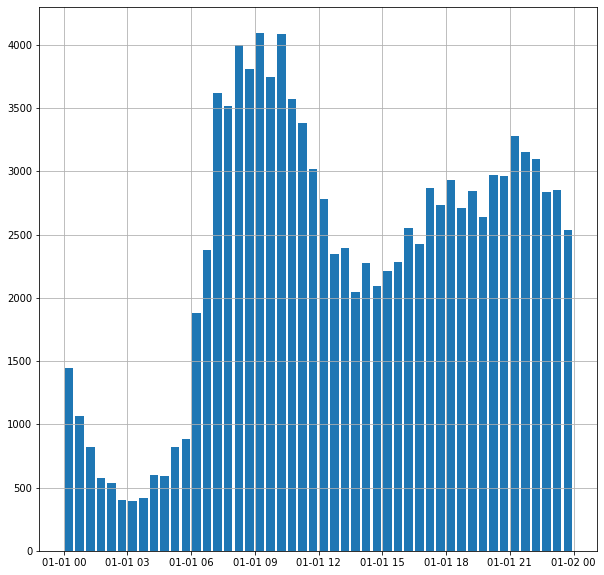

In [223]:
# Plot a histogram of times by hour
# Option 2: plot using the .hist function
# bins = number of equally sized parts to use (e.g. 24)
# rwidth = how wide the bars should be in the plot

plt.figure(figsize = (10,10))

hist = strike_times['TIME'].hist(bins=48, rwidth = .8)

# Issue: get the correct labels on the x-axis (xticks does not work here)

plt.show()

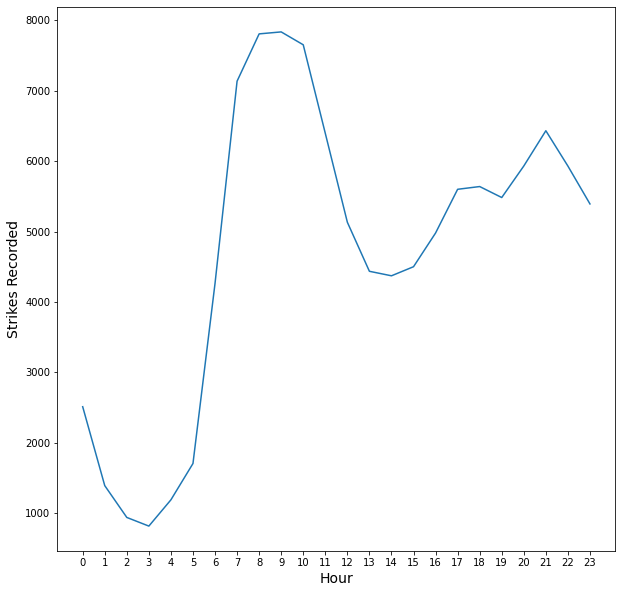

In [224]:
# Plot by hour as an ordinary graph

plt.figure(figsize = (10,10))

plt.plot(range(0,24), strike_times['TIME'].groupby(strike_times['TIME'].dt.hour).count())
plt.xticks(range(0,24))
plt.xlabel("Hour", fontsize = 14)
plt.ylabel("Strikes Recorded", fontsize = 14)

plt.show()